<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

**Let's get started!**

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Get the data

In [3]:
data= pd.read_csv('cleaned_data.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
ID                            26664 non-null object
LIMIT_BAL                     26664 non-null int64
SEX                           26664 non-null int64
EDUCATION                     26664 non-null int64
MARRIAGE                      26664 non-null int64
AGE                           26664 non-null int64
PAY_1                         26664 non-null int64
PAY_2                         26664 non-null int64
PAY_3                         26664 non-null int64
PAY_4                         26664 non-null int64
PAY_5                         26664 non-null int64
PAY_6                         26664 non-null int64
BILL_AMT1                     26664 non-null int64
BILL_AMT2                     26664 non-null int64
BILL_AMT3                     26664 non-null int64
BILL_AMT4                     26664 non-null int64
BILL_AMT5                     26664 non-null int64
BILL_AMT6              

In [5]:
data["default payment next month"].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

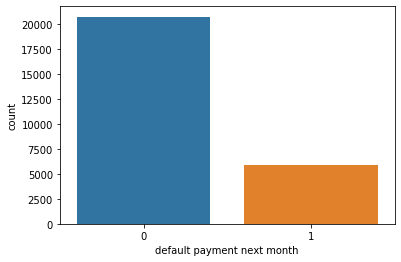

In [6]:
sns.countplot(data["default payment next month"])

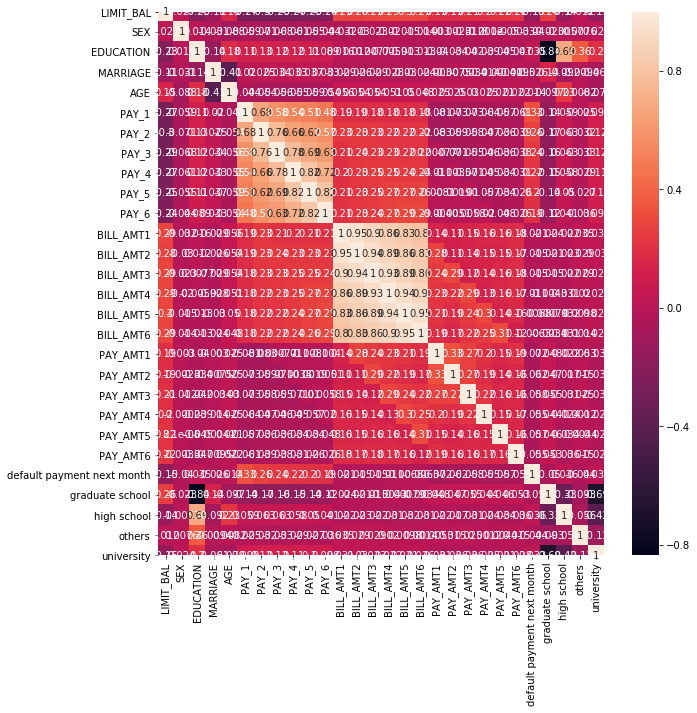

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

# Features selection

In [8]:
features_response = data.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
X=data[features_response[:-1]]
y=data['default payment next month']

# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=24)

# Scalling the Data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating and Training the Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [13]:
rf_params_ex = {'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]} 

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [16]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.8s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=12, n_estimators=200, total=  11.6s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  11.6s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  11.0s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  11.0s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [3, 6, 9, 12]

# Predictions

In [17]:
pred=cv_rf_ex.predict(X_test)

# Evaluating the model

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4178
           1       0.68      0.32      0.44      1155

    accuracy                           0.82      5333
   macro avg       0.76      0.64      0.66      5333
weighted avg       0.80      0.82      0.79      5333



# ROC curve

In [20]:
from sklearn import metrics

In [21]:
predicted_probabilities=cv_rf_ex.predict_proba(X_test)

Text(0.5, 1.0, 'ROC curve')

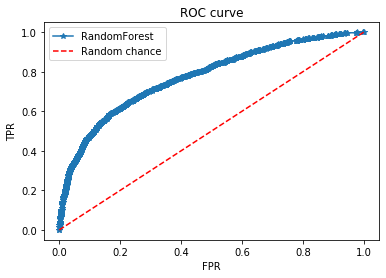

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted_probabilities[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['RandomForest', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [23]:
metrics.roc_auc_score(y_test,predicted_probabilities[:,1])

0.7746399922082067

## xgboost

In [24]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
predictions=model.predict(X_test)

In [26]:
print("classification report:")
print(classification_report(y_test,predictions))



classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4178
           1       0.68      0.33      0.45      1155

    accuracy                           0.82      5333
   macro avg       0.76      0.64      0.67      5333
weighted avg       0.80      0.82      0.80      5333



In [27]:
predicted_probabilities1=model.predict_proba(X_test)

Text(0.5, 1.0, 'ROC curve')

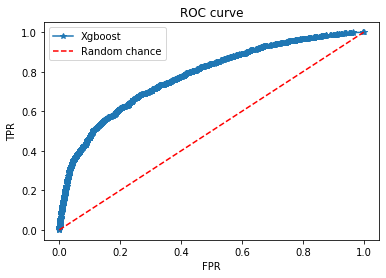

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted_probabilities1[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Xgboost', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [29]:
metrics.roc_auc_score(y_test,predicted_probabilities1[:,1])

0.7782671134514122

# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [31]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions1=model1.predict(X_test)

In [33]:
print("classification report:")
print(classification_report(y_test,predictions1))


classification report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4178
           1       0.70      0.25      0.37      1155

    accuracy                           0.81      5333
   macro avg       0.76      0.61      0.63      5333
weighted avg       0.80      0.81      0.78      5333



In [36]:
predicted_probabilities2=model1.predict_proba(X_test)

Text(0.5, 1.0, 'ROC curve')

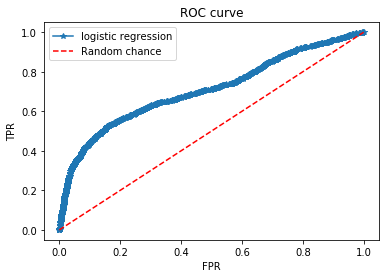

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted_probabilities2[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [38]:
metrics.roc_auc_score(y_test,predicted_probabilities2[:,1])

0.709326735176424